In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [228]:
# Load training and testing dataframes
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [229]:
# Create training and testing arrays
training = np.array(df_train, dtype = 'float32')
testing = np.array(df_test, dtype='float32')

<AxesSubplot:xlabel='label', ylabel='count'>

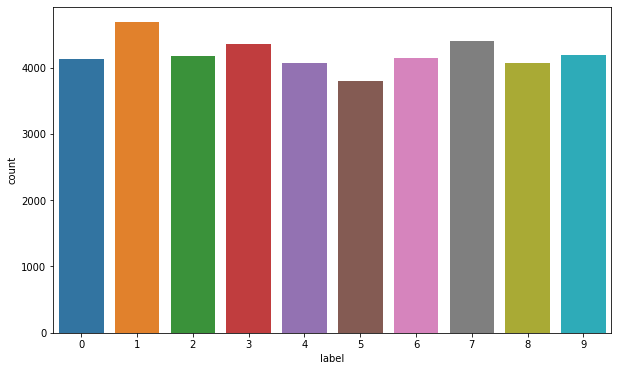

In [230]:
# check if the target classes are balanced
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df_train)

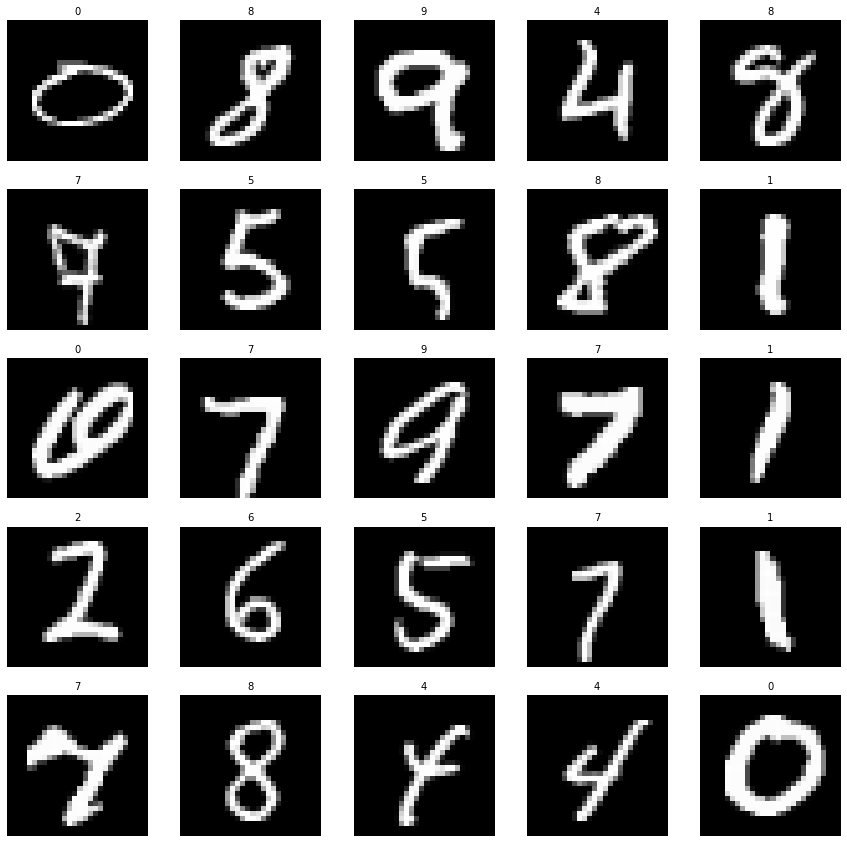

In [231]:
# Visualize the training data
W = 5
H = 5
fig, axes = plt.subplots(W, H, figsize = (15,15))
axes = axes.reshape(-1) # flaten the matrix into array

# Show a random number from testing images 
for i in np.arange(0, W * H): 
    # Select a random number
    index = np.random.randint(0, len(df_train))
    
    # Read and display an image with the selected index    
    axes[i].imshow(training[index,1:].reshape((28,28)), cmap = "gray")
    axes[i].set_title(training[index,0].astype(int), fontsize = 10) # the label
    axes[i].axis('off')

plt.show()

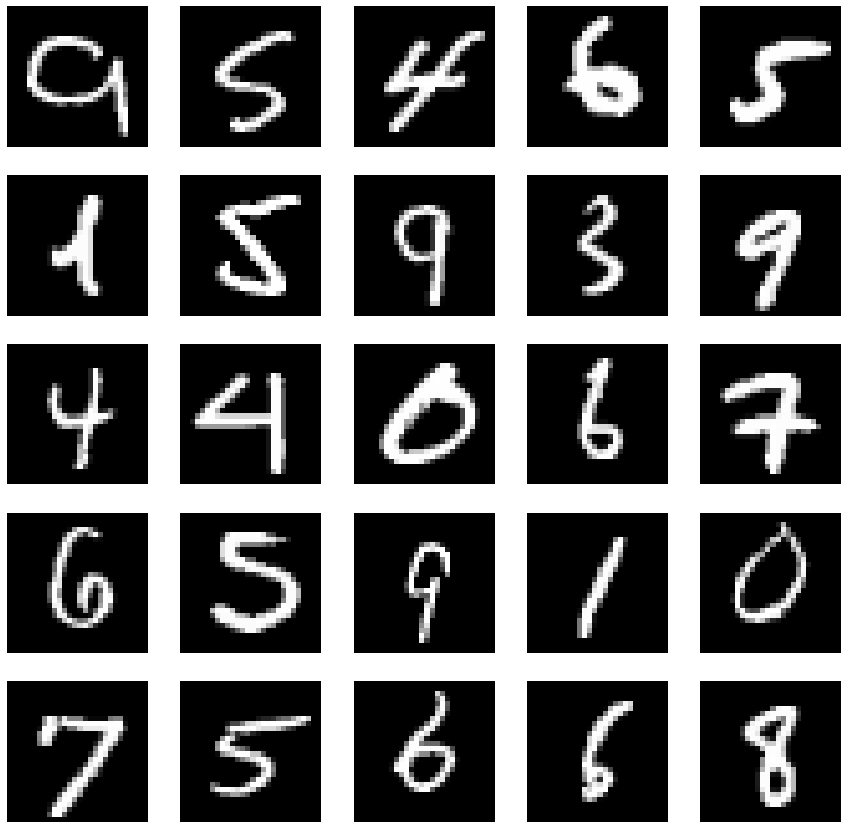

In [232]:
# visualize the test data
W = 5
H = 5
plt.figure(figsize = (15,15))

# Show a random number from testing images 
for i in np.arange(0, W * H): 
    # Select a random number
    index = np.random.randint(0, len(testing))
    plt.subplot(H, W, i + 1)
    # Read and display an image with the selected index    
    plt.imshow(testing[index,:].reshape((28,28)), cmap = "gray")
    plt.axis('off')

plt.show()

In [233]:
X_train_data = training[:, 1:]
y_train_data = keras.utils.to_categorical(training[:, 0], 10)

test_data = testing

X_train_data = X_train_data / 255
test_data = test_data / 255

In [234]:
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2)

In [235]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, test_data.shape

((33600, 28, 28, 1),
 (33600, 10),
 (8400, 28, 28, 1),
 (8400, 10),
 (28000, 28, 28, 1))

In [236]:
model = keras.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
#     Dropout(0.5),
    Dense(10, activation='softmax')    
])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 2304)              0         
                                                                 
 dense_44 (Dense)            (None, 128)             

In [237]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [238]:
tf.random.set_seed(42)

history = model.fit(X_train, 
           y_train, 
           batch_size=32, 
           epochs=5, 
           validation_data=(X_val, y_val))

Epoch 1/5
1050/1050 [==============================] - 21s 19ms/step - loss: 0.1662 - accuracy: 0.9491 - val_loss: 0.0682 - val_accuracy: 0.9776
Epoch 2/5
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0704 - val_accuracy: 0.9771
Epoch 3/5
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0566 - val_accuracy: 0.9836
Epoch 4/5
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 5/5
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0581 - val_accuracy: 0.9832


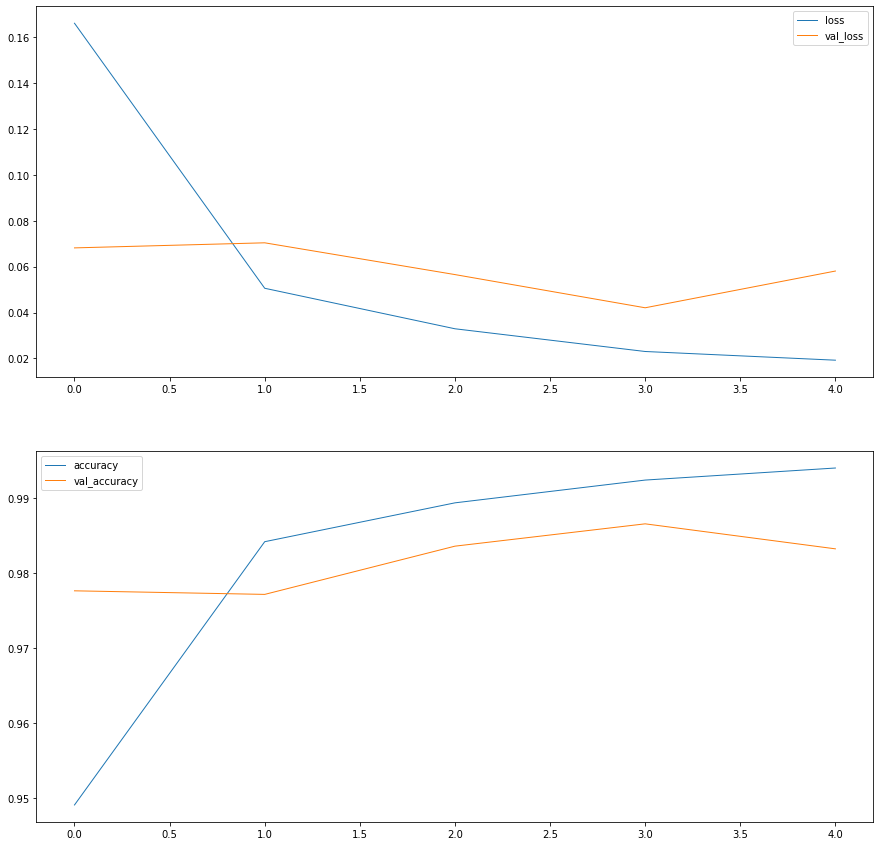

In [239]:
fig, axes = plt.subplots(2, 1, figsize = (15,15))
history_df = pd.DataFrame(history.history)

axes[0].plot(history_df[['loss', 'val_loss']], linewidth=1)
axes[0].legend(['loss', 'val_loss'])

axes[1].plot(history_df[['accuracy', 'val_accuracy']], linewidth=1)
axes[1].legend(['accuracy', 'val_accuracy'])

plt.show()

In [216]:
predictions = pd.read_csv("data/sample_submission.csv")
predictions.drop("Label", axis=1, inplace=True)
predictions["Label"] = model.predict(test_data).argmax(axis=1)

In [217]:
predictions.to_csv("data/my_second_preds.csv", index=False)